# PyHRM - High Resolution Melt Analysis in Python

## Introduction

**Hosted at https://github.com/liuyigh/PyHRM **

Please read a very nice introduction provided by Kapa BioSystems to understand, prepare and troubleshoot

http://www.kapabiosystems.com/document/introduction-high-resolution-melt-analysis-guide/


### Import Python modules for analysis

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read and Plot Melting Data

Go to [GitHub](https://github.com/liuyigh/PyHRM) to view the format of data file. Basically, it's a CSV file exported from CFX manager data analysis melting curve data "RFU" table (Right click to export to CSV). Open with Excel, delet the empty column. First column "Temperature", each of following columns represent a sample well.

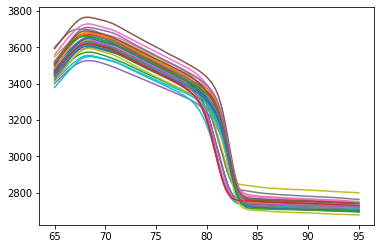

In [8]:
df = pd.read_csv('Sample-HRM-p50-genotyping.csv')
plt.plot(df.iloc[:, 0],df.iloc[:,1:])
plt.show()

### Select melting range

Based on the plot above, select a range of temperature.

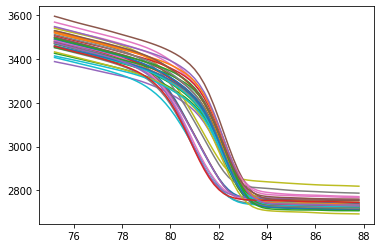

In [11]:
df_melt=df.loc[(df.iloc[:,0]>75) & (df.iloc[:,0]<88)]
df_data=df_melt.iloc[:,1:]
plt.plot(df_melt.iloc[:, 0],df_data)
plt.show()

### Normalizing 

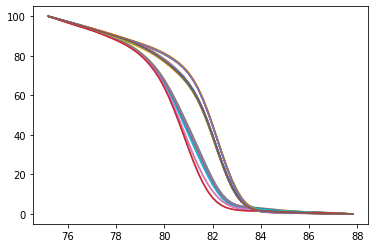

In [13]:
df_norm= (df_data - df_data.min()) / (df_data.max()-df_data.min())*100
plt.plot(df_melt.iloc[:, 0],df_norm)
plt.show()

### Calculate and Show Diff Plot 

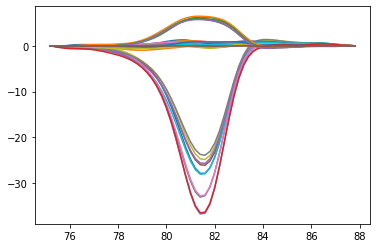

In [14]:
dfdif = df_norm.sub(df_norm['J14'],axis=0)
plt.plot(df_melt.iloc[:, 0],dfdif)
plt.show()

### Clustering

Use KMeans module from SciKit-Learn to cluster your sample into three groups (WT, KO, HET). Be careful, your samples may have less than three groups. So always check the diff plots first.

In [15]:
import sklearn.cluster as sc
from IPython.display import display

In [24]:
mat = dfdif.T
hc = sc.KMeans(n_clusters=3)
hc.fit(mat)

labels = hc.labels_
results = pd.DataFrame([dfdif.T.index,labels])
display(results.loc[:0,results.iloc[1]==0])
display(results.loc[:0,results.iloc[1]==1])
display(results.loc[:0,results.iloc[1]==2])

,0,5,7,8,9,14,16,17,24,33
0,G6,G11,G13,G14,H6,H11,H13,H14,I12,J12


,1,2,3,4,6,10,11,12,13,15,18,19,20,21,26,27,28,29,30,35
0,G7,G8,G9,G10,G12,H7,H8,H9,H10,H12,I6,I7,I8,I9,I14,J6,J7,J8,J9,J14


,22,23,25,31,32,34
0,I10,I11,I13,J10,J11,J13


My controls are 
* WT: I12, J12
* KO: I13, J13
* HET: I14, J14

So you can identify your genotyping results by looking at: to which control they cluster.